## Сравнение 2 групп с помощью t-критерия Стьюдента

**Задание:** В компании по доставке пиццы идёт работа над улучшением приложения для курьеров.
Есть несколько ресторанов в разных частях города и целый штат курьеров. К вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности.  
Был разработан новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома.  
Имеются данные A/B теста для двух равных групп курьеров. Часть курьеров использует старый алгоритм без опции "по пути до дома", другие видят в своем приложении эту опцию и могут ее выбрать. ***Задача*** – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.  

Описание данных:
- order_id - id заказа
- delivery_time - время доставки в минутах
- district - район доставки
- experiment_group - экспериментальная группа

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
experiment = pd.read_csv('https://stepik.org/media/attachments/lesson/385916/experiment_lesson_4.csv')

In [3]:
experiment.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [4]:
experiment.shape

(20196, 4)

Графики распределения по экспериментальным группам и районам

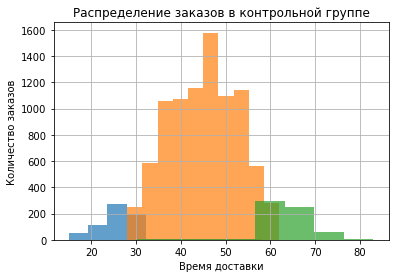

In [5]:
experiment.query('experiment_group == "control"').groupby('district').delivery_time.hist(alpha = 0.7)
plt.title('Распределение заказов в контрольной группе')
plt.xlabel('Время доставки')
plt.ylabel('Количество заказов');

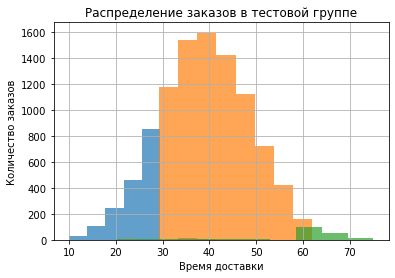

In [6]:
experiment.query('experiment_group == "test"').groupby('district').delivery_time.hist(alpha = 0.7)
plt.title('Распределение заказов в тестовой группе')
plt.xlabel('Время доставки')
plt.ylabel('Количество заказов');

Количество наблюдений в тестовой и контрольной группе

In [7]:
cnt = experiment.groupby('experiment_group').order_id.count()
print(cnt)
print(cnt[1] - cnt[0])

experiment_group
control    10092
test       10104
Name: order_id, dtype: int64
12


In [8]:
test = experiment.query('experiment_group == "test"').delivery_time
control = experiment.query('experiment_group == "control"').delivery_time

Среднее время доставки:

In [9]:
round(test.mean(), 2)

39.05

In [10]:
round(control.mean(), 2)

45.07

Проверка выполнения условий на нормальность, однородность дисперсий и расчёт стандартного отклонения в тесте и в контроле.  
Делаем семплирование перед применением критерия при проверке на нормальность (и для теста, и для контроля), так как на больших выборках могут получаться неверные результаты.

In [11]:
stats.shapiro(test.sample(1000, random_state=17))

ShapiroResult(statistic=0.9975475668907166, pvalue=0.14005419611930847)

In [12]:
stats.shapiro(control.sample(1000, random_state=17))

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

Тест Шапиро-Уилка говорит о том, что значения в тестовой и контрольной группах распределены нормально (нет оснований отклонять нулевые гипотезы о том, что распределения не отличаются от нормального)

In [13]:
round(test.std(), 2)

9.88

In [14]:
round(control.std(), 2)

9.99

In [15]:
stats.levene(test, control)

LeveneResult(statistic=0.2702281101900882, pvalue=0.6031844931083392)

Тест Левена говорит о том, что дисперсии внутри наших групп примерно одинаковы (требование гомогенности дисперсий выполнено).

Сравнение средних в тесте и контроле с помощью t-критерия Стьюдента.

In [16]:
stats.ttest_ind(test, control)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [17]:
# На сколько процентов изменилось среднее время доставки в тестовой группе
round(((test.mean() - control.mean()) / control.mean()) * 100, 2)

-13.35

**Вывод:**  Раскатываем новый алгоритм на всех курьеров, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле на 13,35 %.